In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [2]:
df_311 = pd.read_csv("./311_SR_Food_poisoning_Food_establishment.csv", low_memory=False)
df_311.name = '311'
df_Restaurants_B_C = pd.read_csv("./NYC_RIC_B_C_Grade.csv", low_memory=False)
df_Restaurants_B_C.name = 'Restaurants_B_C'

In [3]:
print(df_311.shape)
print(df_Restaurants_B_C.shape)
print(df_311.columns)
print(df_Restaurants_B_C.columns)

(160662, 46)
(17365, 32)
Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'BBL', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Open Data Channel Type',
       'Park Facility Name', 'Park Borough', 'Vehicle Type',
       'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Latitude', 'Longitude', 'Location', 'Zip Codes', 'Community Districts',
       'Borough Boundaries', 'City Council Districts', 'Police Precincts'],
      dtype='object')
Index(['CAMIS

In [4]:
df_Restaurants_B_C['ZIPCODE'] = pd.to_numeric(df_Restaurants_B_C['ZIPCODE'], errors='coerce')
df_311['Incident Zip'] = pd.to_numeric(df_311['Incident Zip'], errors='coerce')

In [5]:
df_Restaurants_B_C.dropna(subset=['ZIPCODE'], inplace=True)
df_311.dropna(subset=['Incident Zip'], inplace=True)

In [6]:
print(df_Restaurants_B_C.shape)
df_311 = df_311.loc[df_311['Complaint Type'] == 'Food Poisoning']
print(df_311.shape)

(17146, 32)
(38534, 46)


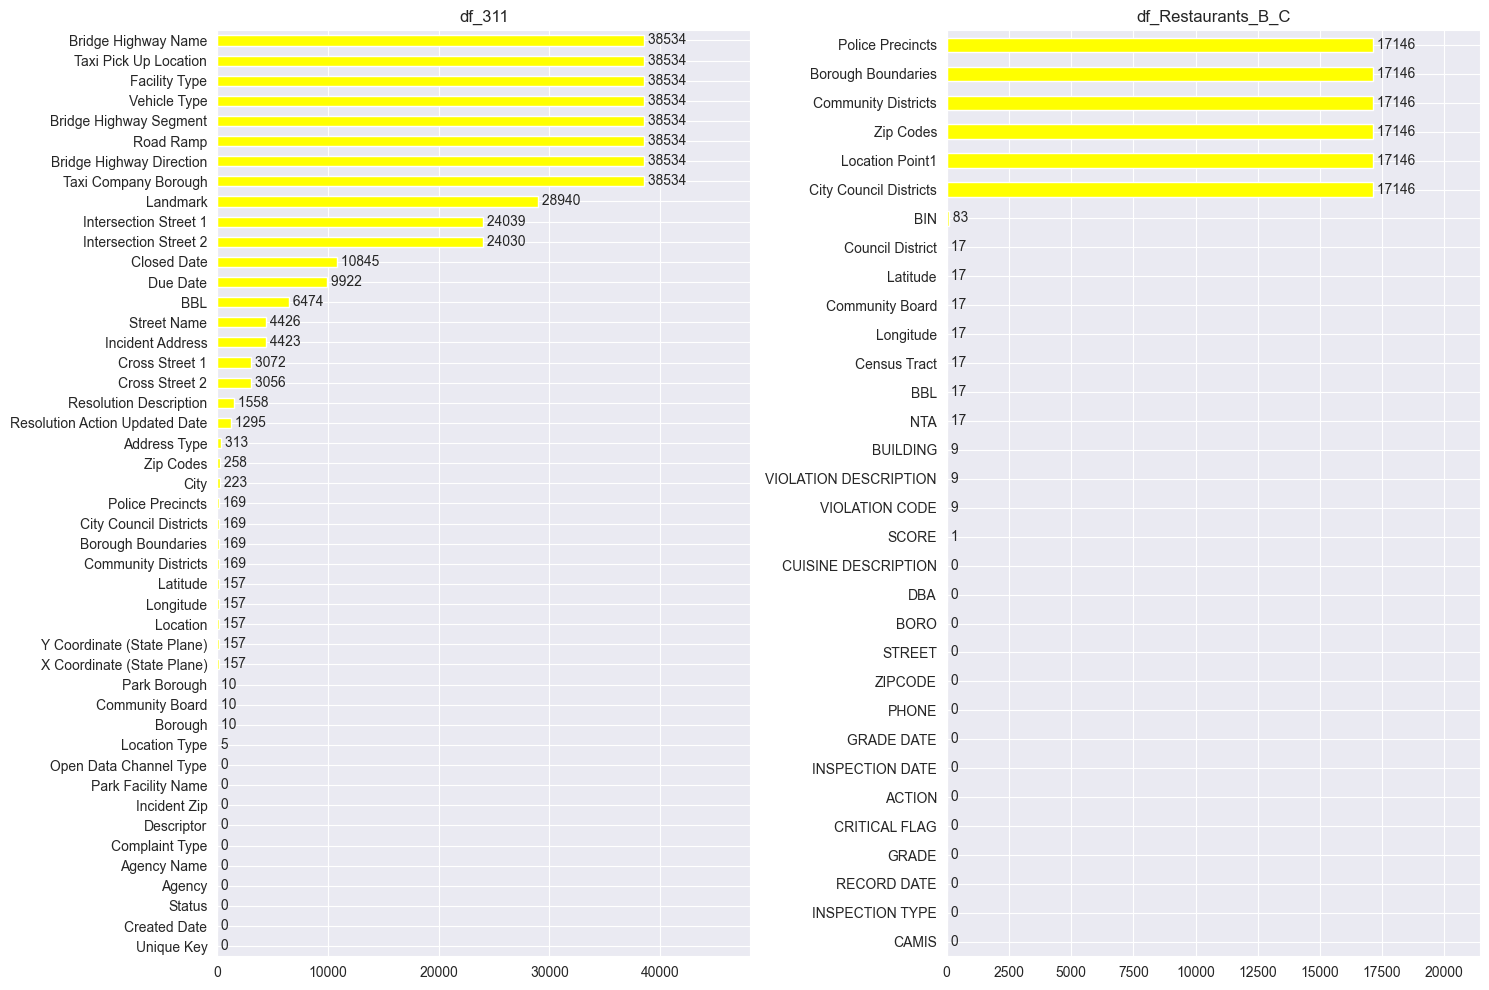

In [7]:
def plot_nan_values(*dataframes):
    """
    Generates graphs showing the number of missing values (NaN) in the specified DataFrame objects.

    Parameters:
    *dataframes: A variable set of arguments that are DataFrame objects to parse.

    Description:
    The function creates graphs for each DataFrame object passed in the arguments. The graph shows the number of NaN values for
    each column as horizontal bars. The plot header contains the name of the DataFrame object passed as an argument.
     """
    plt.figure(figsize=(15, 10 * (len(dataframes) / 2)))
    subplot_loc = (len(dataframes) - int(len(dataframes) / 2)) * 100 + 21
    for i in range(len(dataframes)):
        plt.subplot(subplot_loc + i)  # Adjust the figure size as needed
        nan_counts = dataframes[i].isna().sum().sort_values(ascending=True)
        nan_counts.plot(kind='barh', color='yellow')
        plt.title([name for name, obj in globals().items() if obj is dataframes[i]][0])
        plt.xlim(0, len(dataframes[i]) * 1.25)
        for index, value in enumerate(nan_counts):
            plt.text(value, index, f' {value} ', ha='left', va='center')
    plt.tight_layout()

plot_nan_values(df_311, df_Restaurants_B_C)

In [8]:
def rm_nan_columns_with_treshold(df, threshold=0.25):
    """
    Removes columns in a DataFrame that have above a specified threshold percentage of missing values.

    Parameters:
    df: The DataFrame object from which you want to remove columns with many missing values.
    threshold (optional): Threshold for the percentage of missed values. The default value is 0.25 (25%).

    Description:
    The function calculates the percentage of missing values for each column in the DataFrame object df. If the percentage of missing values for a column exceeds the specified threshold, then this column is removed from the DataFrame.
    """
    nan_percentage_df = df.isna().mean()
    columns_to_drop = nan_percentage_df[nan_percentage_df > threshold].index
    print(f'Droped columns in '
          f'{[name for name, obj in globals().items() if obj is df][0]}:\n'
          f'{columns_to_drop}\n')
    return df.drop(columns=columns_to_drop).copy()

filtered_df_Restaurants_B_C = rm_nan_columns_with_treshold(df_Restaurants_B_C)
filtered_df_311 = rm_nan_columns_with_treshold(df_311)

Droped columns in df_Restaurants_B_C:
Index(['Location Point1', 'Zip Codes', 'Community Districts',
       'Borough Boundaries', 'City Council Districts', 'Police Precincts'],
      dtype='object')

Droped columns in df_311:
Index(['Closed Date', 'Intersection Street 1', 'Intersection Street 2',
       'Landmark', 'Facility Type', 'Due Date', 'Vehicle Type',
       'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment'],
      dtype='object')



(17146, 26)
(38534, 33)


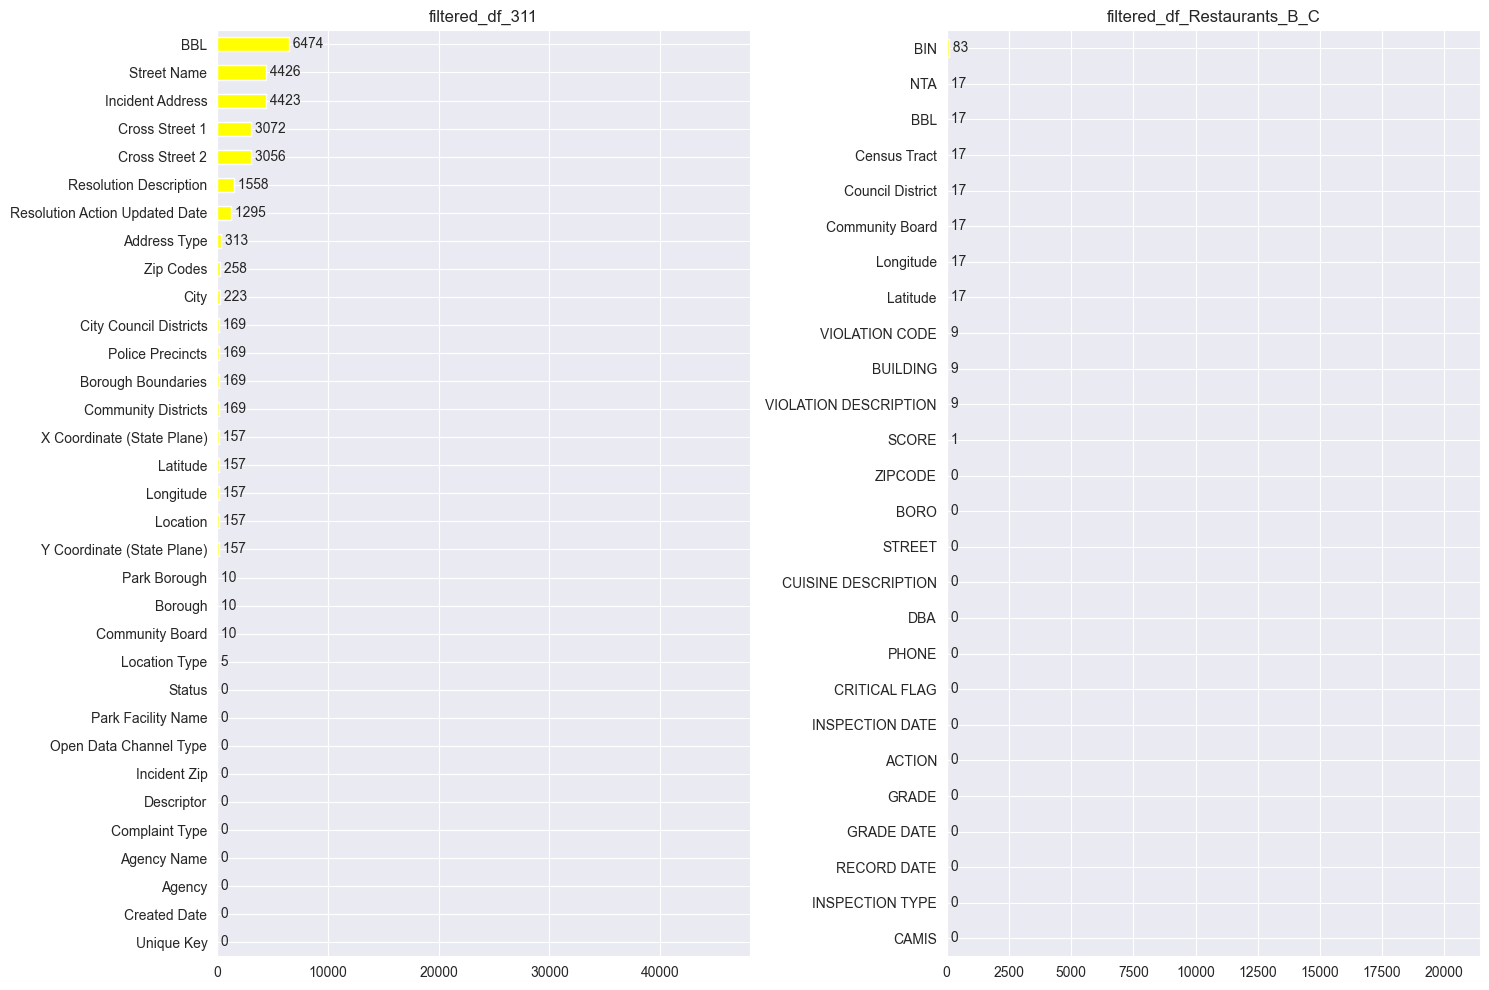

In [9]:
print(filtered_df_Restaurants_B_C.shape)
print(filtered_df_311.shape)
plot_nan_values(filtered_df_311, filtered_df_Restaurants_B_C)

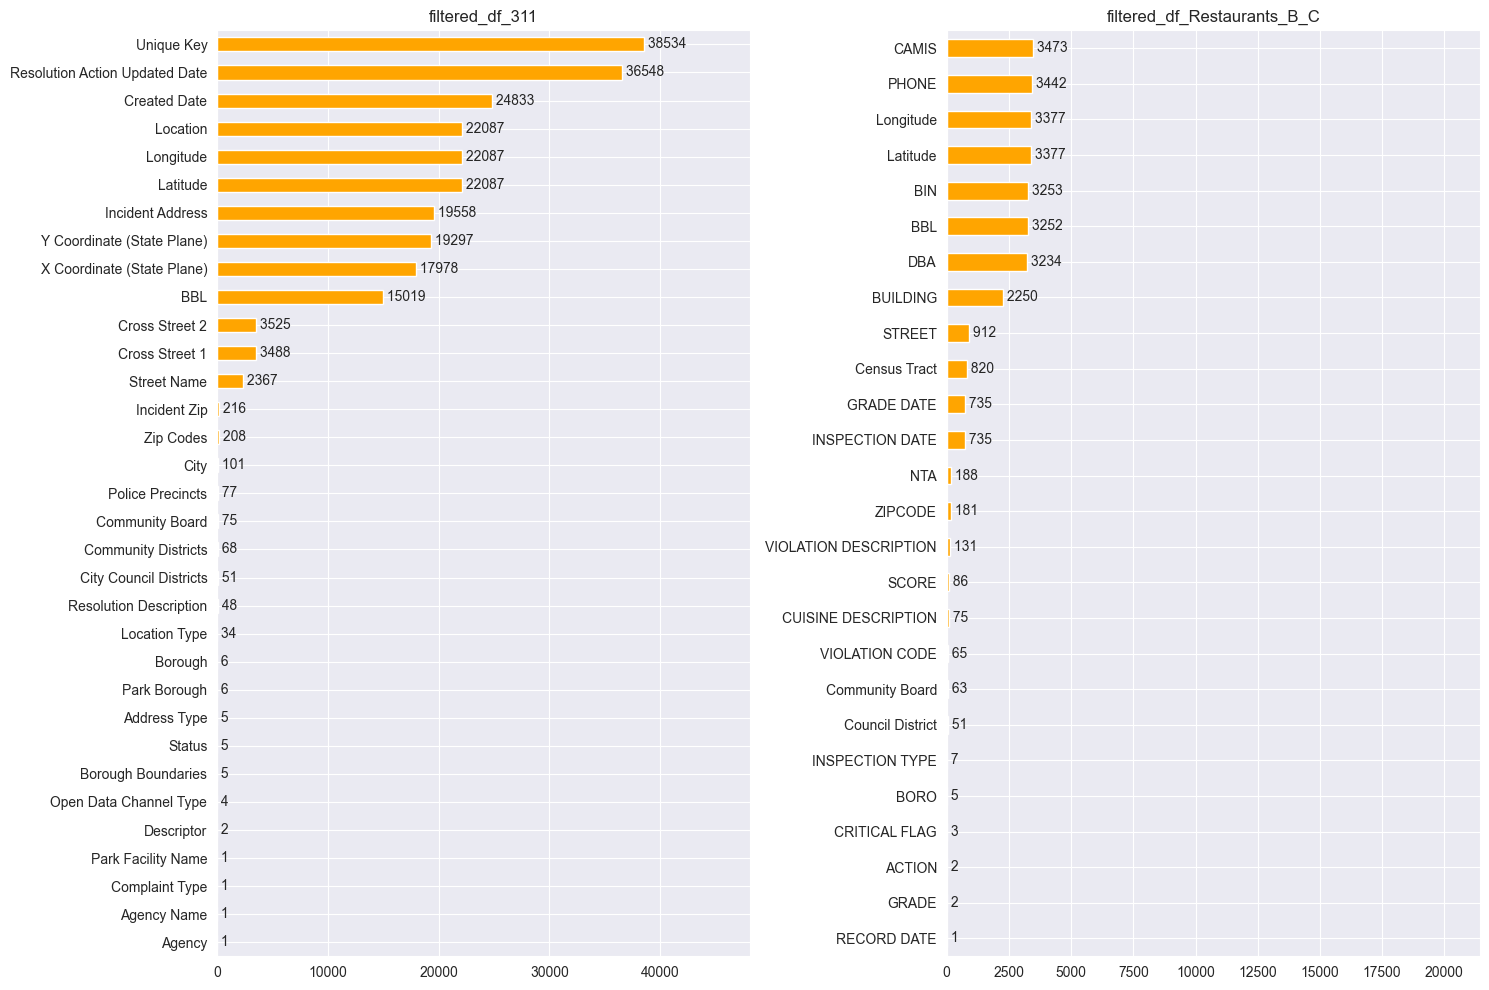

In [10]:
def plot_unique_values(*dataframes):
    """
    Generates graphs showing the number of missing values (NaN) in the specified DataFrame objects.

    Parameters:
    *dataframes: A variable set of arguments that are DataFrame objects to parse.

    Description:
    The function creates graphs for each DataFrame object passed in the arguments. The graph shows the number of NaN values for
    each column as horizontal bars. The plot header contains the name of the DataFrame object passed as an argument.
     """
    plt.figure(figsize=(15, 10 * (len(dataframes) / 2)))
    subplot_loc = (len(dataframes) - int(len(dataframes) / 2)) * 100 + 21
    for i in range(len(dataframes)):
        plt.subplot(subplot_loc + i)  # Adjust the figure size as needed
        unique_vals = dataframes[i].nunique().sort_values(ascending=True)
        unique_vals.plot(kind='barh', color='orange')
        plt.title([name for name, obj in globals().items() if obj is dataframes[i]][0])
        plt.xlim(0, len(dataframes[i]) * 1.25)
        for index, value in enumerate(unique_vals):
            plt.text(value, index, f' {value} ', ha='left', va='center')
    plt.tight_layout()

plot_unique_values(filtered_df_311, filtered_df_Restaurants_B_C)

Droped columns in filtered_df_311:
['Agency', 'Agency Name', 'Complaint Type', 'Park Facility Name', 'Created Date', 'Resolution Action Updated Date', 'City', 'X Coordinate (State Plane)', 'Y Coordinate (State Plane)', 'Street Name', 'Cross Street 1', 'Cross Street 2', 'Longitude', 'Latitude', 'Zip Codes', 'Incident Address', 'Unique Key', 'Address Type', 'Status', 'BBL', 'Location', 'Park Facility Name', 'Park Borough', 'Borough', 'Community Districts', 'City Council Districts', 'Community Board', 'Open Data Channel Type', 'Resolution Description', 'Borough Boundaries', 'Police Precincts']

Droped columns in filtered_df_Restaurants_B_C:
['RECORD DATE', 'INSPECTION DATE', 'GRADE DATE', 'INSPECTION DATE', 'BUILDING', 'STREET', 'Longitude', 'Latitude', 'DBA', 'BORO', 'CAMIS', 'PHONE', 'BBL', 'BIN', 'NTA', 'Community Board', 'Council District', 'Census Tract', 'INSPECTION TYPE', 'ACTION', 'CRITICAL FLAG']



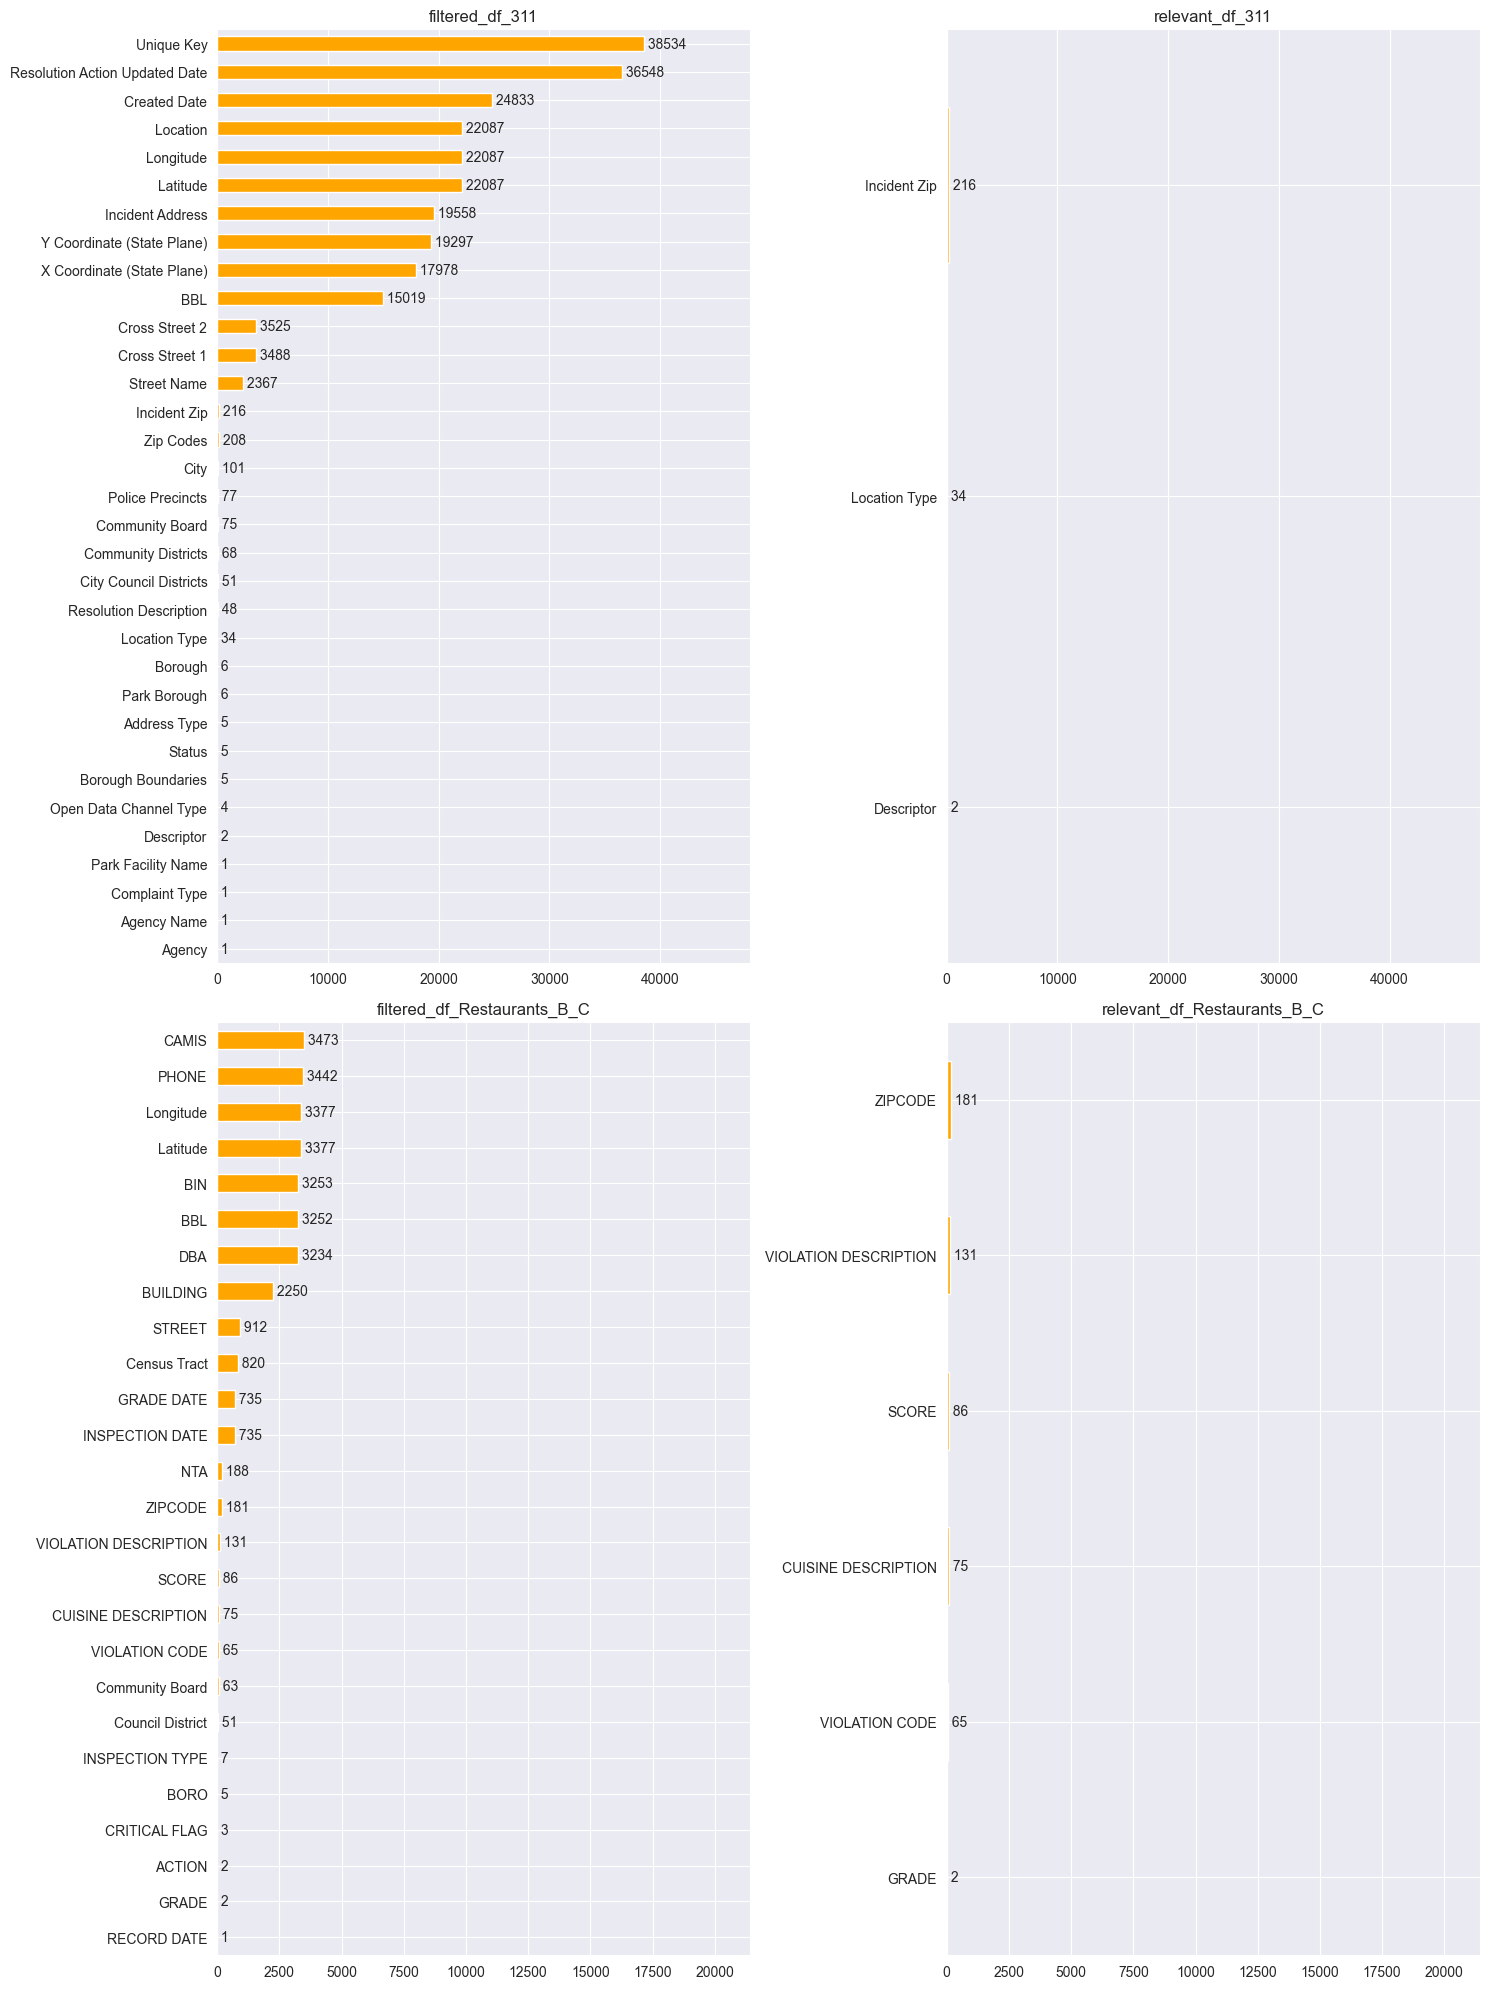

In [11]:
def get_cols_to_drop_f_df_311():
    ### columns to drop in filtered_dff_311
    # one val columns
    f_df_311_cols_to_drop = [col for col in filtered_df_311.columns
                             if filtered_df_311[col].nunique() == 1]
    # date cols
    f_df_311_cols_to_drop.extend(['Created Date', 'Resolution Action Updated Date'])
    # location cols(which higher by hierarchy than ZipCode)
    f_df_311_cols_to_drop.extend(['City'])
    # location cols(which lower by hierarchy than ZipCode)
    f_df_311_cols_to_drop.extend(
        ['X Coordinate (State Plane)', 'Y Coordinate (State Plane)',
         'Street Name', 'Cross Street 1', 'Cross Street 2', 'Longitude', 'Latitude']
    )
    # SUBJECTIVE VIEW
    f_df_311_cols_to_drop.extend(
        ['Zip Codes', 'Incident Address', 'Unique Key',
        'Address Type', 'Status', 'BBL', 'Location',
         'Park Facility Name', 'Park Borough', 'Borough',
         'Community Districts', 'City Council Districts',
         'Community Board', 'Open Data Channel Type',
         'Resolution Description', 'Borough Boundaries',
         'Police Precincts']
    )
    return f_df_311_cols_to_drop

def get_cols_to_drop_f_restaurants_b_c():
    ### columns to drop in filtered_dff_311
    # one val columns
    f_df_restaurants_b_c_cols_to_drop = [col for col in filtered_df_Restaurants_B_C.columns
                                         if filtered_df_Restaurants_B_C[col].nunique() == 1]
    # date cols
    f_df_restaurants_b_c_cols_to_drop.extend(
        ['INSPECTION DATE', 'GRADE DATE', 'INSPECTION DATE',
         ]
    )
    # location cols(which lower by hierarchy than ZipCode)
    f_df_restaurants_b_c_cols_to_drop.extend(
        ['BUILDING', 'STREET', 'Longitude', 'Latitude']
    )
    # SUBJECTIVE VIEW
    f_df_restaurants_b_c_cols_to_drop.extend(
        ['DBA', 'BORO', 'CAMIS', 'PHONE', 'BBL', 'BIN', 'NTA',
         'Community Board', 'Council District',
         'Census Tract', 'INSPECTION TYPE', 'ACTION', 'CRITICAL FLAG']
    )

    return f_df_restaurants_b_c_cols_to_drop

def rm_useless_columns(df, cols_to_drop):
    """
    Removes columns in a DataFrame that have only one value.

    Parameters:
    df: The DataFrame object from which you want to remove columns with many missing values.

    Description:
    The function calculates the number of values in dataframe columns and drops if it contains only one value
    """
    print(f'Droped columns in '
          f'{[name for name, obj in globals().items() if obj is df][0]}:\n'
          f'{cols_to_drop}\n')
    return df.drop(columns=cols_to_drop).copy()


# columns to drop in filtered_df_Restaurants_B_C
df_311_cols_to_drop = get_cols_to_drop_f_df_311()
df_Restaurants_cols_to_drop = get_cols_to_drop_f_restaurants_b_c()

relevant_df_311 = rm_useless_columns(filtered_df_311, df_311_cols_to_drop)
relevant_df_Restaurants_B_C = rm_useless_columns(filtered_df_Restaurants_B_C, df_Restaurants_cols_to_drop)

plot_unique_values(filtered_df_311, relevant_df_311,
                   filtered_df_Restaurants_B_C, relevant_df_Restaurants_B_C)

In [12]:
relevant_df_Restaurants_B_C.rename(columns={'ZIPCODE': 'Incident Zip'}, inplace=True)

In [13]:
merged_df = pd.merge(
    relevant_df_311[['Incident Zip']],
    relevant_df_Restaurants_B_C[['Incident Zip', 'GRADE']],
    on='Incident Zip', how='inner')

count_C = merged_df[merged_df['GRADE'] == 'C'].groupby('Incident Zip')['Incident Zip'].count()
count_B = merged_df[merged_df['GRADE'] == 'B'].groupby('Incident Zip')['Incident Zip'].count()

unique_zips = merged_df['Incident Zip'].unique()

result_df = pd.DataFrame({'Incident Zip': unique_zips, 'Count_C_zip': 0, 'Count_B_zip': 0})

for zip_code in unique_zips:
    if zip_code in count_C:
        result_df.loc[result_df['Incident Zip'] == zip_code, 'Count_C_zip'] = count_C[zip_code]
    if zip_code in count_B:
        result_df.loc[result_df['Incident Zip'] == zip_code, 'Count_B_zip'] = count_B[zip_code]

In [14]:
result_df

,Incident Zip,Count_C_zip,Count_B_zip
0,10019.0,112404,131784
1,10013.0,123380,161200
2,11201.0,75360,104876
3,10468.0,10416,9331
4,11235.0,17185,24059
...,...,...,...
176,10121.0,96,96
177,11109.0,0,60
178,10281.0,0,60
179,11433.0,430,258


In [15]:
result_df['Overall_Count_zip'] = result_df['Count_C_zip'] + result_df['Count_B_zip']

result_df['Ratio_C_zip'] = result_df.apply(
    lambda row: row['Overall_Count_zip'] / row['Count_C_zip'] if row['Count_C_zip'] != 0 else 0, axis=1)

result_df['Ratio_B_zip'] = result_df.apply(
    lambda row: row['Overall_Count_zip'] / row['Count_B_zip'] if row['Count_B_zip'] != 0 else 0, axis=1)

result_df['Ratio_C_all'] = result_df['Count_C_zip'].apply(lambda x: 0 if x == 0 else result_df['Count_C_zip'].sum() / x)

result_df['Ratio_B_all'] = result_df['Count_B_zip'].apply(lambda x: 0 if x == 0 else result_df['Count_B_zip'].sum() / x)

<Axes: xlabel='Incident Zip'>

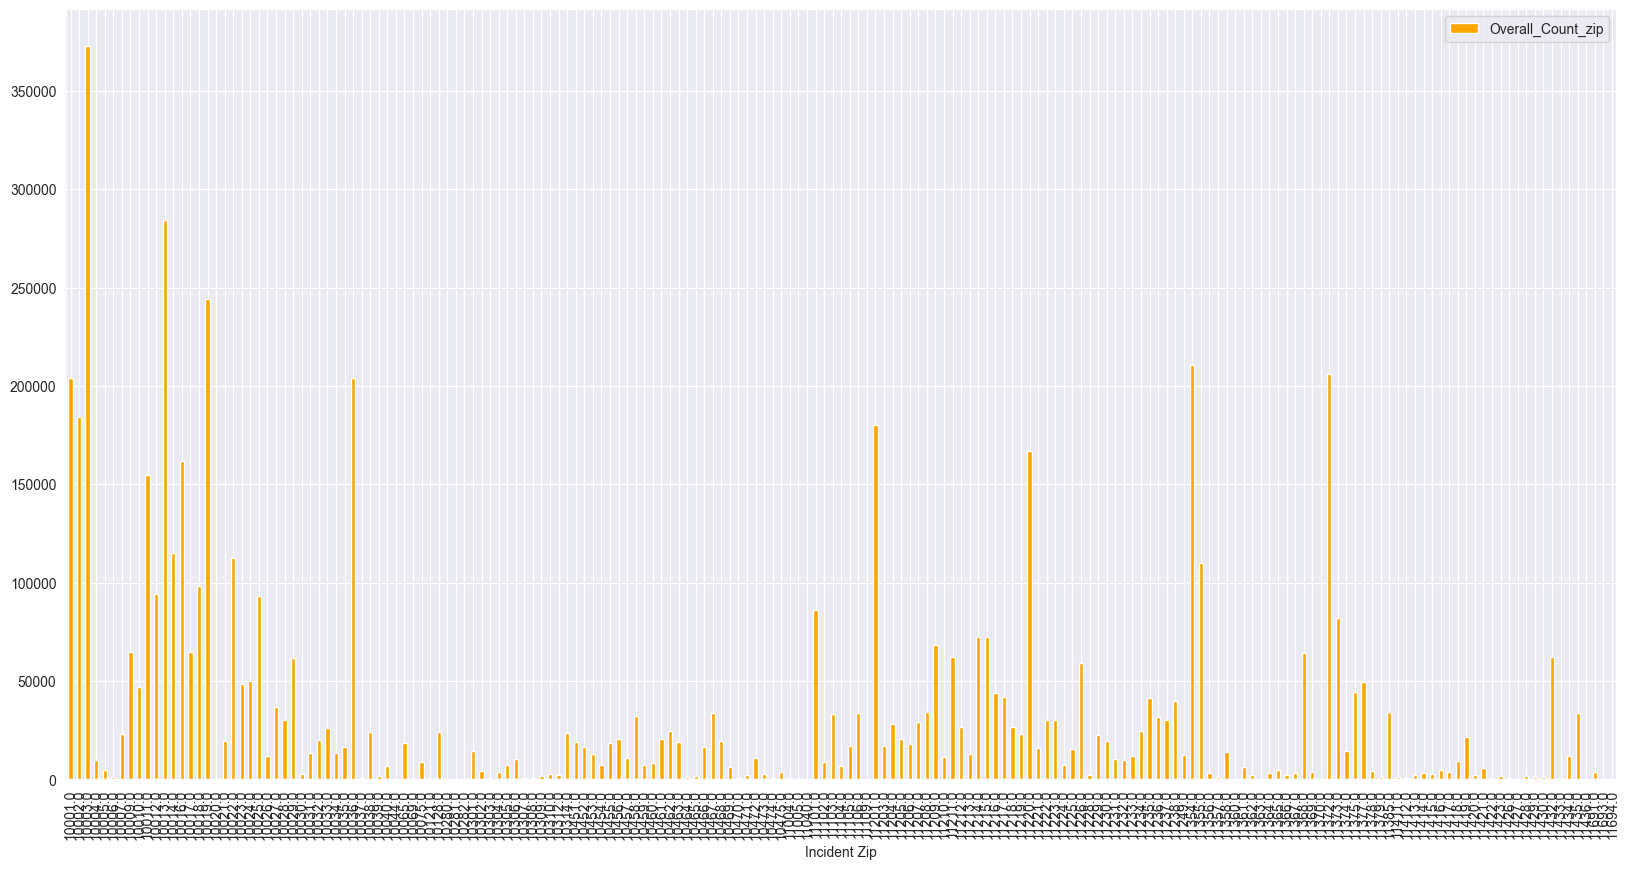

In [16]:
result_df = result_df.sort_values(by='Incident Zip')
result_df.plot(x='Incident Zip', y=['Overall_Count_zip'], kind='bar', figsize=(20, 10), color='orange')

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

train_df, test_df = train_test_split(result_df, test_size=0.2, random_state=0)

train_X = train_df.drop(columns='Overall_Count_zip')
train_Y = train_df['Overall_Count_zip']

test_X = test_df.drop(columns='Overall_Count_zip')
test_Y = test_df['Overall_Count_zip']

In [18]:
param_grid = {
    'n_estimators': [95, 96 , 97],
    'max_depth': [None, 20, 21, 22],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

RFR = RandomForestRegressor(random_state=0)

grid_search = GridSearchCV(estimator=RFR,
                           param_grid=param_grid,
                           cv=2,
                           scoring='neg_mean_absolute_percentage_error')

grid_search.fit(train_X, train_Y)

best_params = grid_search.best_params_

best_RFR = grid_search.best_estimator_

y_pred = best_RFR.predict(test_X)

mape = mean_absolute_percentage_error(test_Y, y_pred)

print(f"Best Model Parameters: {best_params}")
print(f"Mape: {mape}")

Best Model Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 96}
Mape: 0.12828495078265437


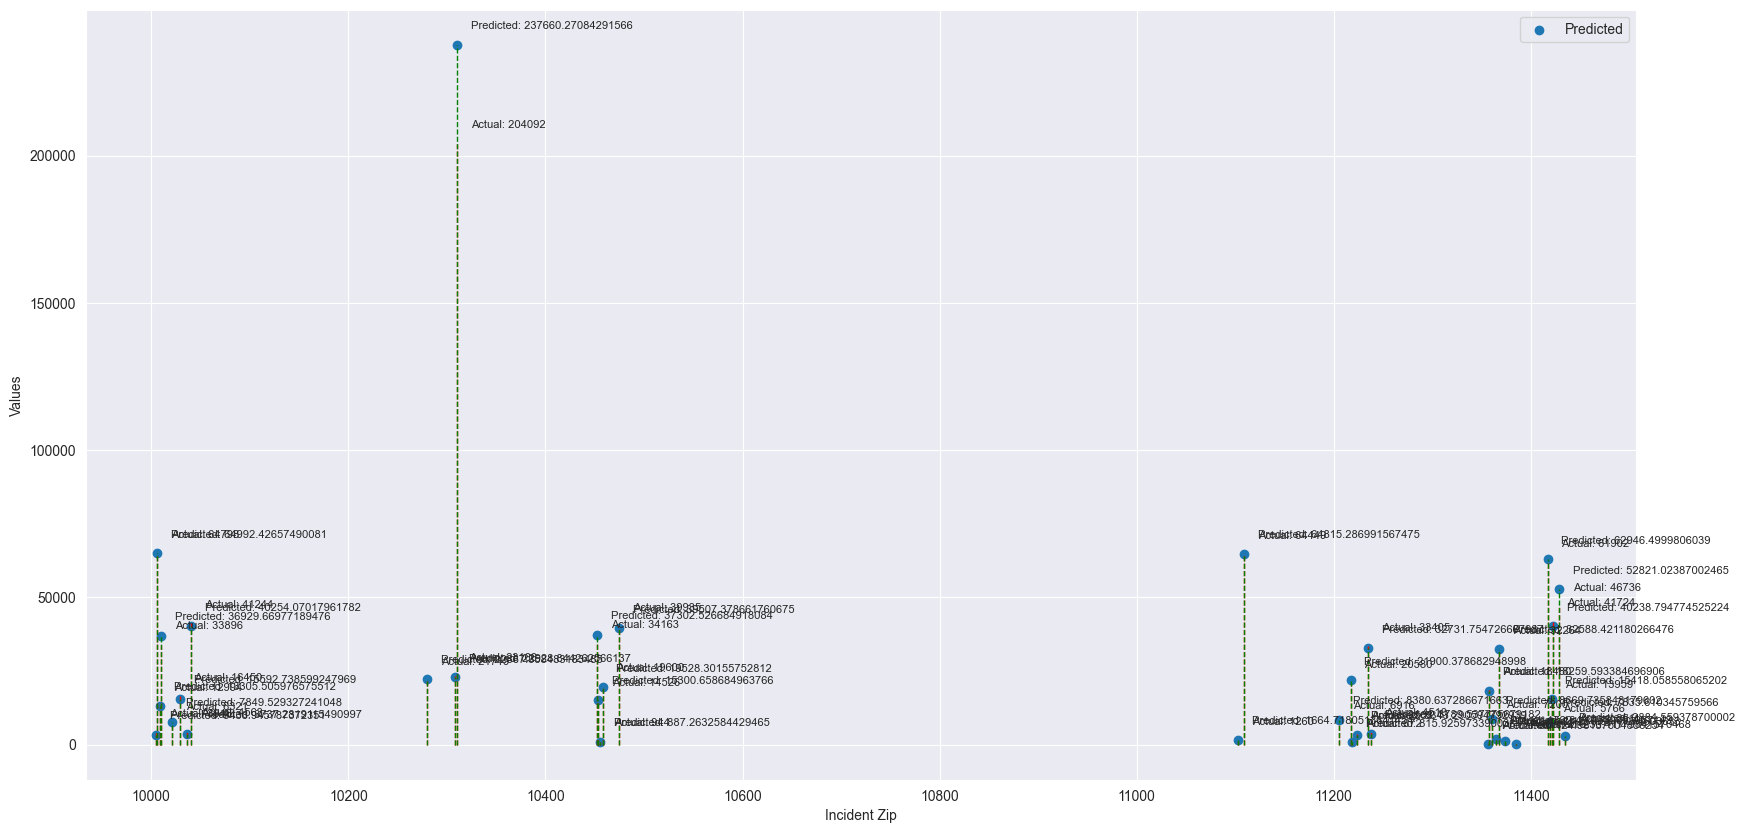

In [19]:
import matplotlib.pyplot as plt

# Your data
test_X = test_X.sort_values(by='Incident Zip')  # Sorting the data

# Create a figure and set its size
plt.figure(figsize=(20, 10))

# Create a scatter plot
plt.scatter(test_X['Incident Zip'], y_pred, label='Predicted')

# Loop through the data and draw vertical lines
for i in range(len(test_X)):
    x = test_X['Incident Zip'].iloc[i]
    y_actual = test_Y.iloc[i]
    y_predicted = y_pred[i]

    plt.plot([x, x], [0, y_actual], 'r--', linewidth=1)  # Red dashed line to the X-axis for actual
    plt.plot([x, x], [0, y_predicted], 'g--', linewidth=1)  # Green dashed line to the X-axis for predicted

# Annotate the points
for i in range(len(test_X)):
    x = test_X['Incident Zip'].iloc[i]
    y_actual = test_Y.iloc[i]
    y_predicted = y_pred[i]

    plt.annotate(f'Actual: {y_actual}', (x, y_actual), fontsize=8, va='bottom', xytext=(10, 10), textcoords='offset points')
    plt.annotate(f'Predicted: {y_predicted}', (x, y_predicted), fontsize=8, va='bottom', xytext=(10, 10), textcoords='offset points')

# Label the axes and add a legend
plt.xlabel('Incident Zip')
plt.ylabel('Values')
plt.legend()

# Show the plot
plt.show()


In [20]:
pred_result_df = result_df.copy()
pred_result_df['Predicted'] = best_RFR.predict(result_df.drop(columns='Overall_Count_zip'))
pred_result_df = pred_result_df.sort_values(by='Incident Zip')

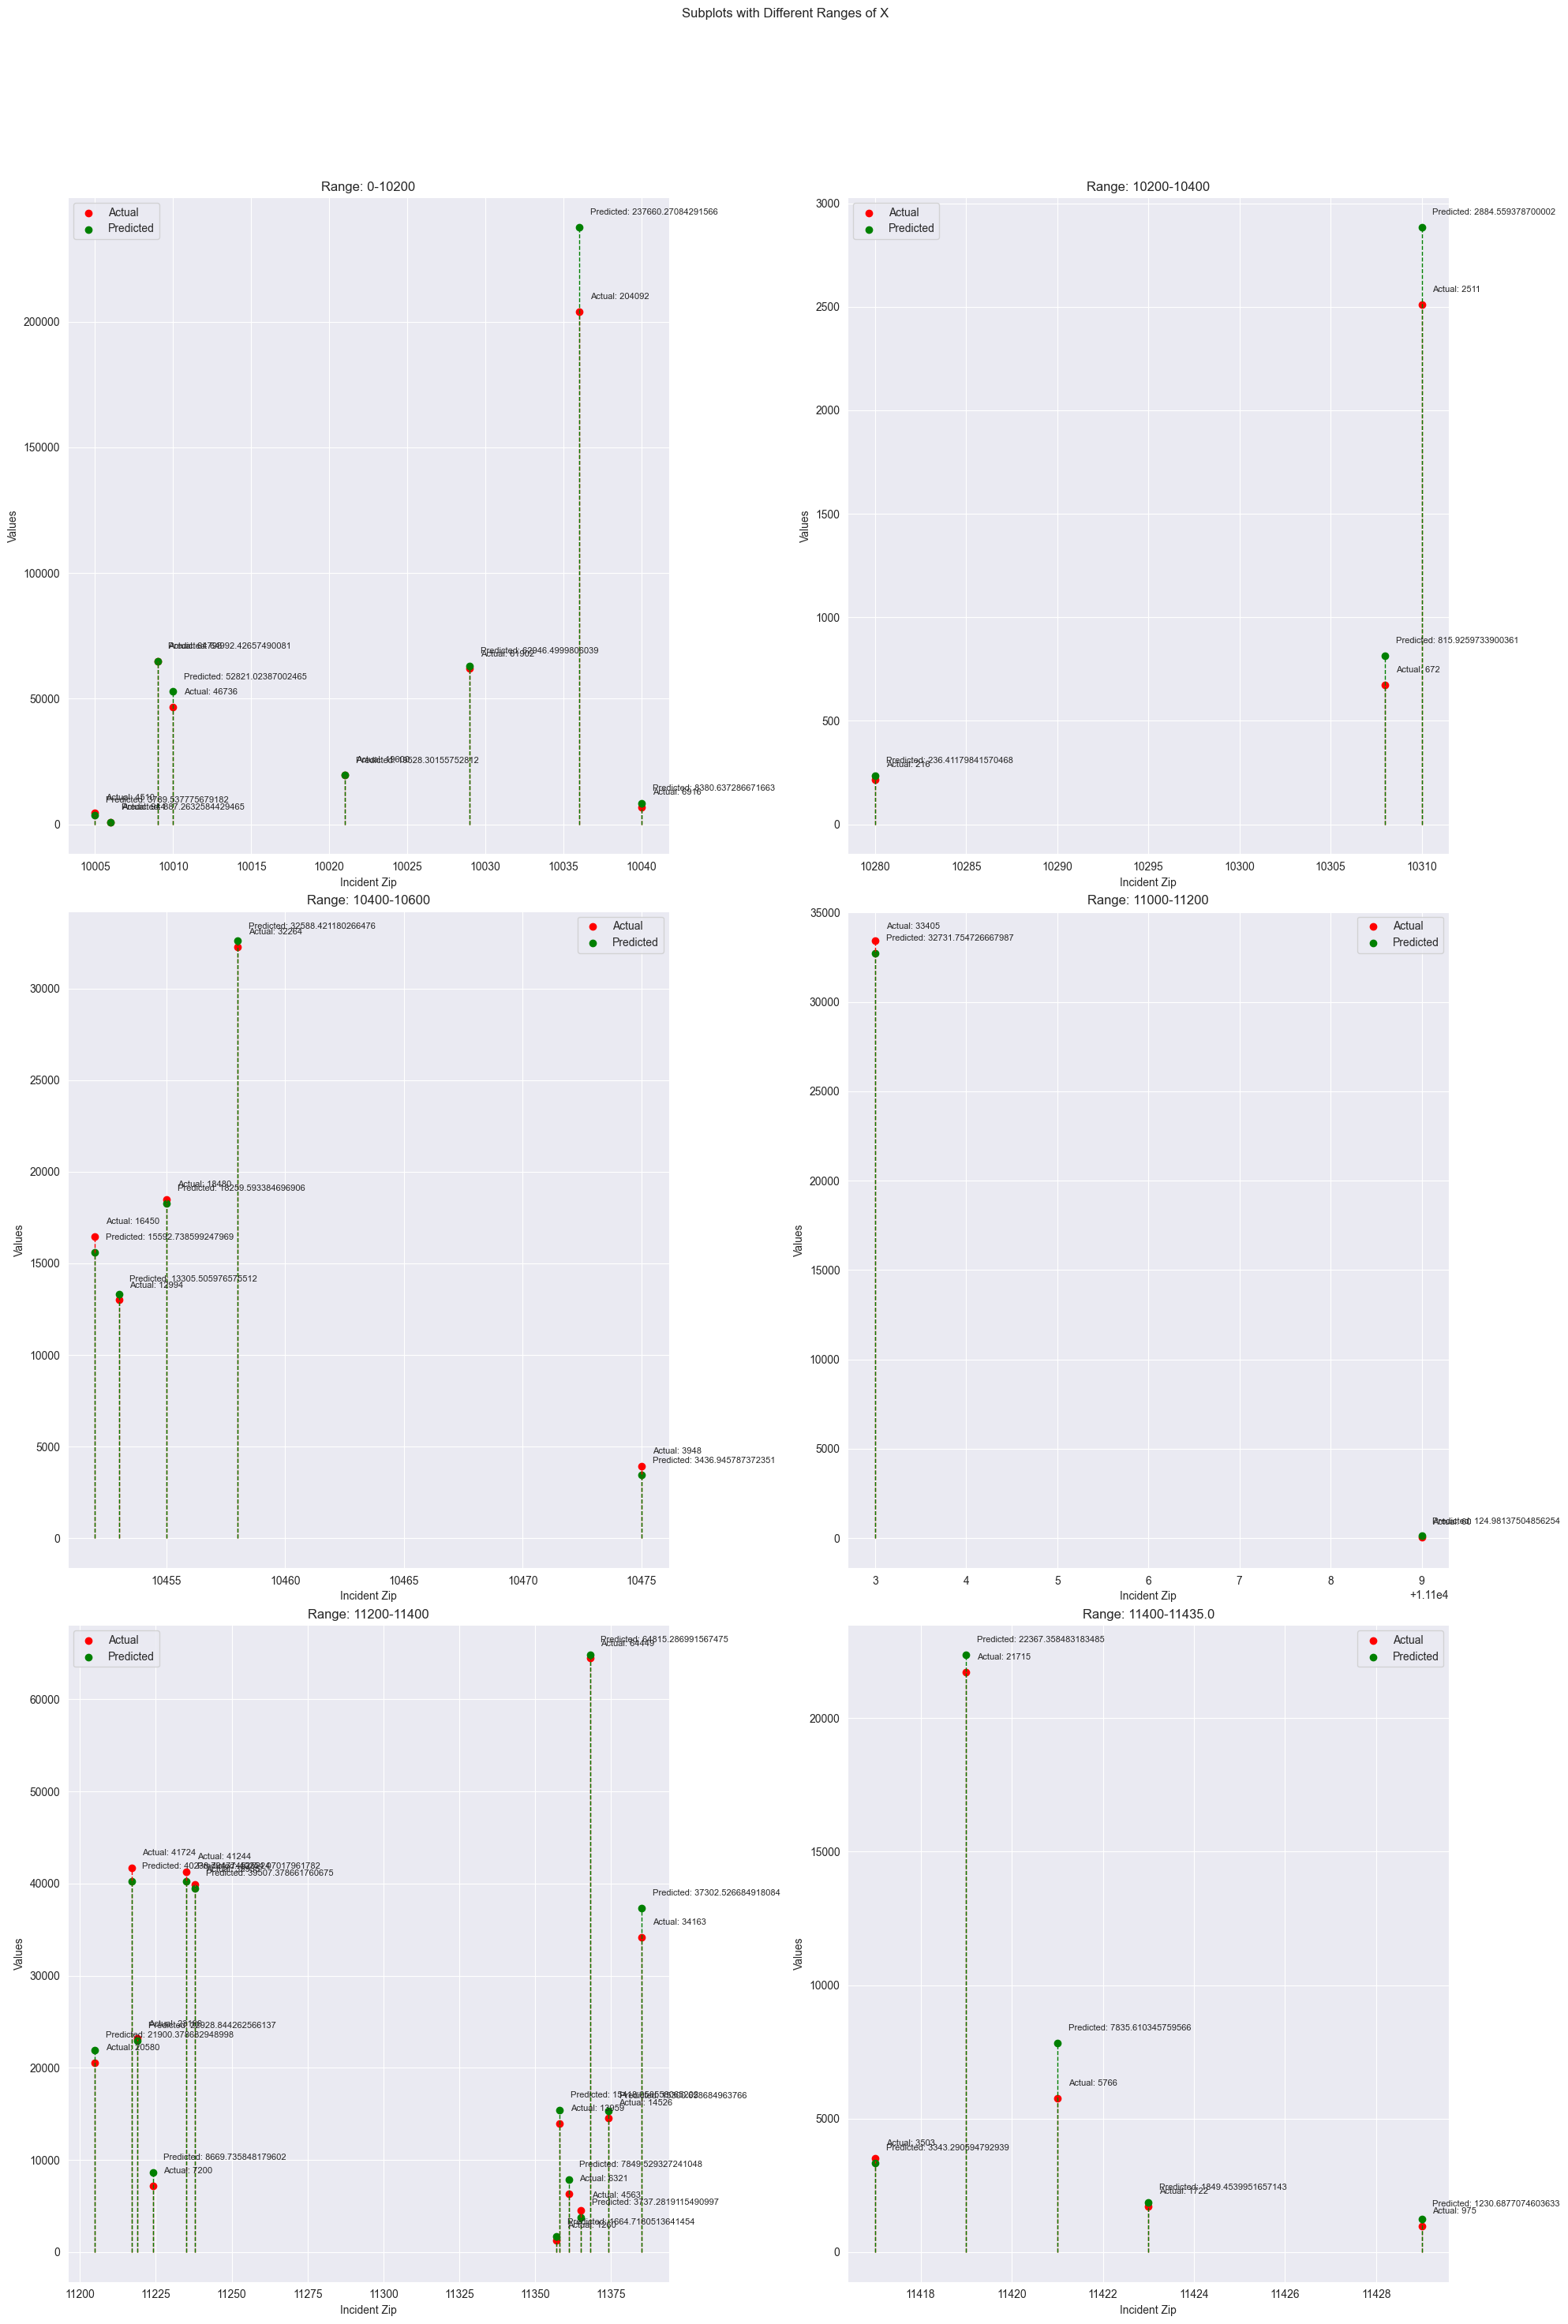

In [21]:
import matplotlib.pyplot as plt

test_X = test_X.sort_values(by='Incident Zip')  # Sorting the data

ranges = [(0, 10200), (10200, 10400), (10400, 10600), (11000, 11200), (11200, 11400), (11400, test_X['Incident Zip'].max())]

fig, axs = plt.subplots(3, 2, figsize=(20, 30))
fig.suptitle('Subplots with Different Ranges of X')

for i, (start, end) in enumerate(ranges):
    row, col = i // 2, i % 2
    ax = axs[row, col]

    data_range = test_X[(test_X['Incident Zip'] >= start) & (test_X['Incident Zip'] < end)]
    y_actual_range = test_Y[data_range.index]
    y_predicted_range = pred_result_df['Predicted'][data_range.index]

    ax.scatter(data_range['Incident Zip'], y_actual_range, label='Actual', color='red')
    ax.scatter(data_range['Incident Zip'], y_predicted_range, label='Predicted', color='green')

    for j in range(len(data_range)):
        x = data_range['Incident Zip'].iloc[j]
        y_actual = y_actual_range.iloc[j]
        y_predicted = y_predicted_range.iloc[j]

        ax.plot([x, x], [0, y_actual], 'r--', linewidth=1, label='_nolegend_')
        ax.plot([x, x], [0, y_predicted], 'g--', linewidth=1, label='_nolegend_')

    for j in range(len(data_range)):
        x = data_range['Incident Zip'].iloc[j]
        y_actual = y_actual_range.iloc[j]
        y_predicted = y_predicted_range.iloc[j]

        ax.annotate(f'Actual: {y_actual}', (x, y_actual), fontsize=8, va='bottom', xytext=(10, 10), textcoords='offset points')
        ax.annotate(f'Predicted: {y_predicted}', (x, y_predicted), fontsize=8, va='bottom', xytext=(10, 10), textcoords='offset points')

    ax.set_title(f'Range: {start}-{end}')
    ax.set_xlabel('Incident Zip')
    ax.set_ylabel('Values')
    ax.legend()

plt.tight_layout()
plt.subplots_adjust(top=0.9)

plt.show()


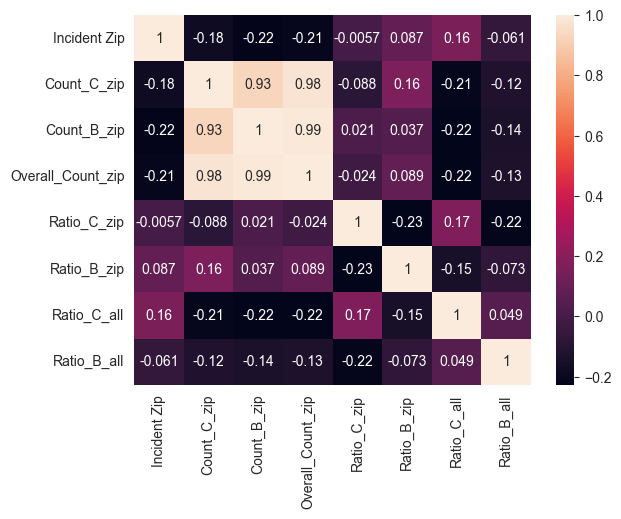

In [22]:
corr = result_df.corr(method='pearson')
sns.heatmap(corr, annot=True)
plt.show()

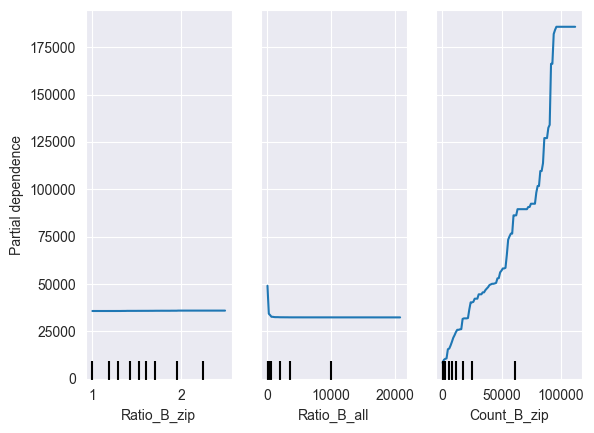

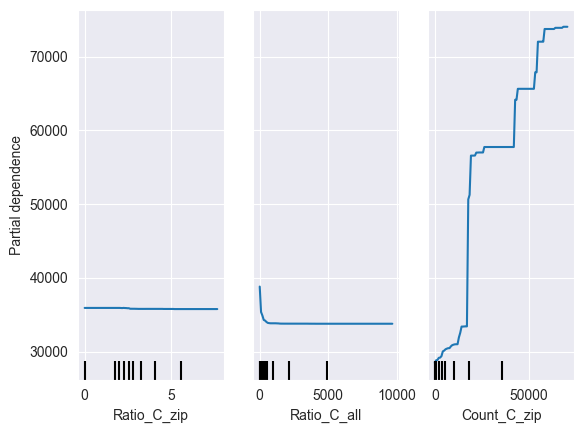

In [23]:
from sklearn.inspection import partial_dependence, PartialDependenceDisplay
var = ['Ratio_B_zip', 'Ratio_B_all', 'Count_B_zip']
PartialDependenceDisplay.from_estimator(best_RFR, train_X, features=var)
var = ['Ratio_C_zip', 'Ratio_C_all', 'Count_C_zip']
PartialDependenceDisplay.from_estimator(best_RFR, train_X, features=var)

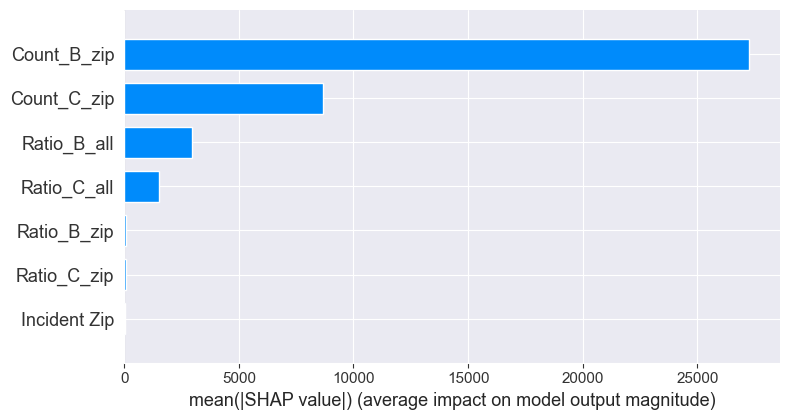

In [24]:
import shap
shap_values = shap.TreeExplainer(best_RFR).shap_values(train_X)
shap.summary_plot(shap_values, train_X, plot_type="bar")

In [25]:
def predict_count_for_zip(model, data, zip_code):
    input_data = data[data['Incident Zip'] == zip_code].drop(columns=['Overall_Count_zip'])
    prediction = model.predict(input_data)

    return prediction[0]

zip_to_predict = 11101.0
predicted_count = predict_count_for_zip(best_RFR, result_df, zip_to_predict)
print(f"Predicted Count for Zip {zip_to_predict}: {predicted_count}")
print(f"Actual Count for Zip {zip_to_predict}: {result_df[result_df['Incident Zip'] == zip_to_predict]['Overall_Count_zip'].values[0]}")


Predicted Count for Zip 11101.0: 84638.54950103427
Actual Count for Zip 11101.0: 86067
